Problem Statement: 

To build a model to predict whether someone is going to make a deposit(FD) or not depending on some attributes (Parameters).

For better marketing campaings in the future based on the previous(this) marketing campaign.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#To remove waarnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
data= files.upload()

Saving bank.csv to bank (1).csv


In [ ]:
df= pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:

age (numeric)

job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')

loan: has personal loan? (categorical: 'no','yes','unknown')

contact: contact communication type (categorical: 'cellular','telephone')

month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a 
previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

y. has the client subscribed a term deposit? (binary: 'yes','no')
According to the dataset documentation, we need to remove the 'duration' column because in real-case the duration is only known after the label column is known. This problem can be considered to be 'data leakage' where predictors include data that will not be available at the time you make predictions.

In this case we want to focus on the recall value of our model because in our problem we should try to predict as many actual positive as we can. Because a misclassification of customer who actually wanted to make a deposit can mean a lose opportunity/revenue.

1) Future campaign focus based on deposit classification. Where to focus(Feature importance)?
2) ML problem: Binary classification 
3) Understand data: read, features(which type), size, cols, describe, unique for categorical, data balance.
4) NUll(missing), duplicate, distribution of data (to get sense of feature and outliers).


In [ ]:
#duration says how long customer had a conversation (time)
#But in real time (live) data, will not know about duration, so we drop this col
#It can cause data leakage problem.
df= df.drop('duration', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe() #it descibes your all numerical data type columns

,age,balance,day,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,63.000000,854.000000,58.000000


In [ ]:
#df.describe(include='all') #all columns details

check unique values in the categorical dtype

In [ ]:
#checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.nunique()  #to find unique categories in categorical data

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
print(list(df['job'].unique()))  #just checking

['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']


In [ ]:
df.duplicated().sum()  #one dup, we found

# Find the duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]

# Print the duplicate rows
print(duplicate_rows)

      age         job marital education default  balance housing loan  \
5505   32  management  single  tertiary      no        0      no   no   
7252   32  management  single  tertiary      no        0      no   no   

       contact  day month  campaign  pdays  previous poutcome deposit  
5505  cellular   22   aug         2     -1         0  unknown      no  
7252  cellular   22   aug         2     -1         0  unknown      no  


In [ ]:
#drop duplicates
df = df.drop_duplicates()
#To check duplicates
df.duplicated().sum()

0

In [ ]:
df.value_counts('deposit') #checking target var. disb.

deposit
no     5872
yes    5289
dtype: int64

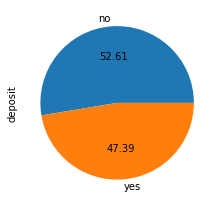

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
df['deposit'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

Its almost balanced. so we treat as a balanced dataset.

**EDA**

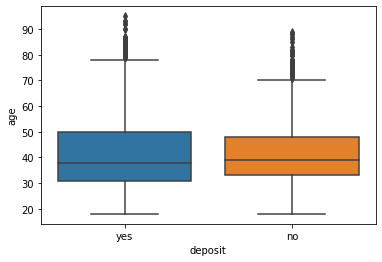

In [ ]:
#I want to know the distribution of data. To getting sense of data spread, outliers etc.
sns.boxplot(x='deposit',y='age', data=df)      #using seaborn
plt.show()

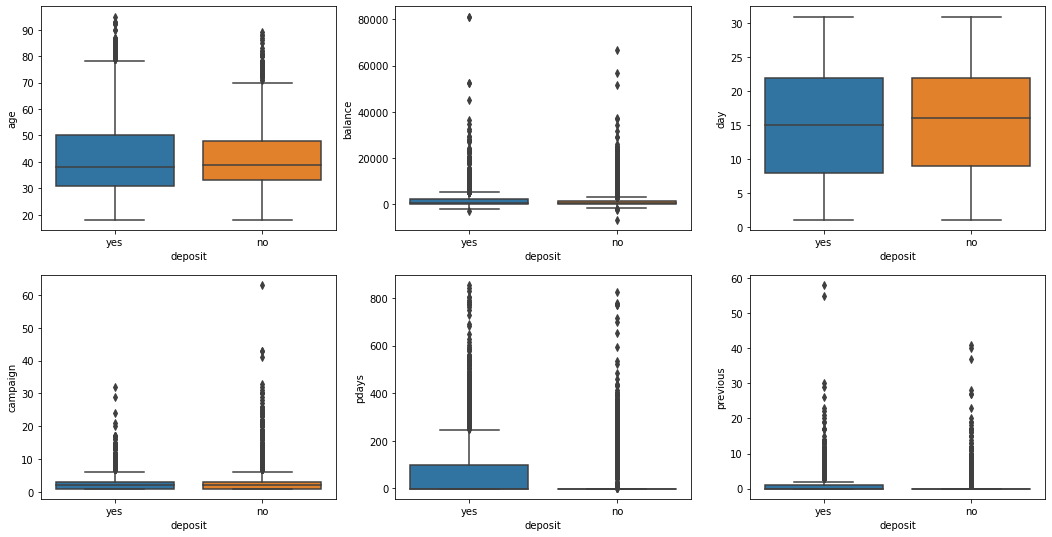

In [ ]:
plt.figure(figsize=(18,14))

plt.subplot(3,3,1)
sns.boxplot(x='deposit',y='age', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='deposit',y='balance', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='deposit',y='day', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='deposit',y='campaign', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='deposit',y='pdays', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='deposit',y='previous', data=df)
plt.show()

To see distribution of data of each input feature with target variable.
Found some insights of featr as well, for example: I can say that between 8th to 22nd 'day' of every month, by using day boxplot (People generally respond and buy).
for checking outliers. Apart from Iqr, we can consider out but not getting how to read.

Here, we are not saying about outliers r8 now

<Axes: >

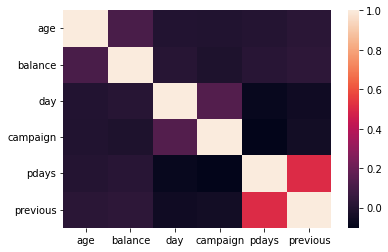

In [ ]:
#checking correlation between continous(numerical) features(columns) 
sns.heatmap(df.corr())

In [ ]:
df.corr()   #in numbers

,age,balance,day,campaign,pdays,previous
age,1.000000,0.112271,-0.000710,-0.005291,0.002741,0.020144
balance,0.112271,1.000000,0.010500,-0.013902,0.017391,0.030790
day,-0.000710,0.010500,1.000000,0.137023,-0.077202,-0.058958
campaign,-0.005291,-0.013902,0.137023,1.000000,-0.102735,-0.049706
pdays,0.002741,0.017391,-0.077202,-0.102735,1.000000,0.507264
previous,0.020144,0.030790,-0.058958,-0.049706,0.507264,1.000000


No corr b/w columns except pdays and previous has some corr (50%). So there's no multi-colinearity.

Multicollinearity can also cause instability in the model, leads to affect model performance.

Especially in regression problems.

Handling multi-colinearity tips:

1) Remove one of the correlated variables: If two or more variables are highly correlated, then removing one of the variables can help reduce the multicollinearity.

2) Combine the correlated variables: If two or more variables are highly correlated, then you can create a new variable by taking a linear combination of those variables. For example, if two variables x1 and x2 are highly correlated, then you can create a new variable x3 = ax1 + bx2, where a and b are constants.

3) Use regularization techniques: Regularization techniques like Ridge Regression and Lasso Regression can help reduce the impact of multicollinearity on the model.

4) Use dimensionality reduction techniques: Techniques like Principal Component Analysis (PCA) and Factor Analysis can help reduce the number of variables in the dataset by combining the correlated variables into new variables, called principal components or factors.

In [ ]:
df.groupby('deposit').mean()  #my personal technique to understand a little about feature imp but it's not official

,age,balance,day,campaign,pdays,previous
deposit,,,,,,
no,40.838896,1280.445163,16.107119,2.839407,35.691587,0.528440
yes,41.670070,1804.267915,15.158253,2.141047,68.702968,1.170354


Here, the diff of 0 & 1 of each category will tell us about the feature that it will help us to classify or not.
Here, balance,pdays are important. But, cant say about feture importance.

In [ ]:
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})
#df1['deposit'] = df1['deposit'].apply(lambda x: 1 if x == 'yes' else 0)   can use Lambda function as well
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1


In [ ]:
df.corr()['deposit']

age         0.034837
balance     0.081092
day        -0.056265
campaign   -0.128102
pdays       0.151559
previous    0.139843
deposit     1.000000
Name: deposit, dtype: float64

from these, I can say that theres no high corr with deposit. Correlation is somewhat help to know feature impo. (in general)

In [ ]:
'''Not sure about this method, so dropping it as of now
#To know feature importance but later realised that's not the way to know fetr impo
X=df1[['age', 'balance', 'day', 'pdays', 'campaign', 'previous']]
y=df1['deposit']

from sklearn.linear_model import SGDClassifier
#model= LogisticRegression(SGDClassifier)
model= SGDClassifier(loss='log', random_state= 42)    
#random_state(typically 42)- consistent result & to shuffle the data, 
#improves model performance on test data 
model.fit(X, y)
print(model.coef_)'''

"Not sure about this method, so dropping it as of now\n#To know feature importance but later realised that's not the way to know fetr impo\nX=df1[['age', 'balance', 'day', 'pdays', 'campaign', 'previous']]\ny=df1['deposit']\n\nfrom sklearn.linear_model import SGDClassifier\n#model= LogisticRegression(SGDClassifier)\nmodel= SGDClassifier(loss='log', random_state= 42)    \n#random_state(typically 42)- consistent result & to shuffle the data, \n#improves model performance on test data \nmodel.fit(X, y)\nprint(model.coef_)"

By this, age, day, campaign impacts much on model. But cant say about feature impo

By examining the coefficients, we can infer which independent variables are most strongly associated with the dependent variable and in which direction.

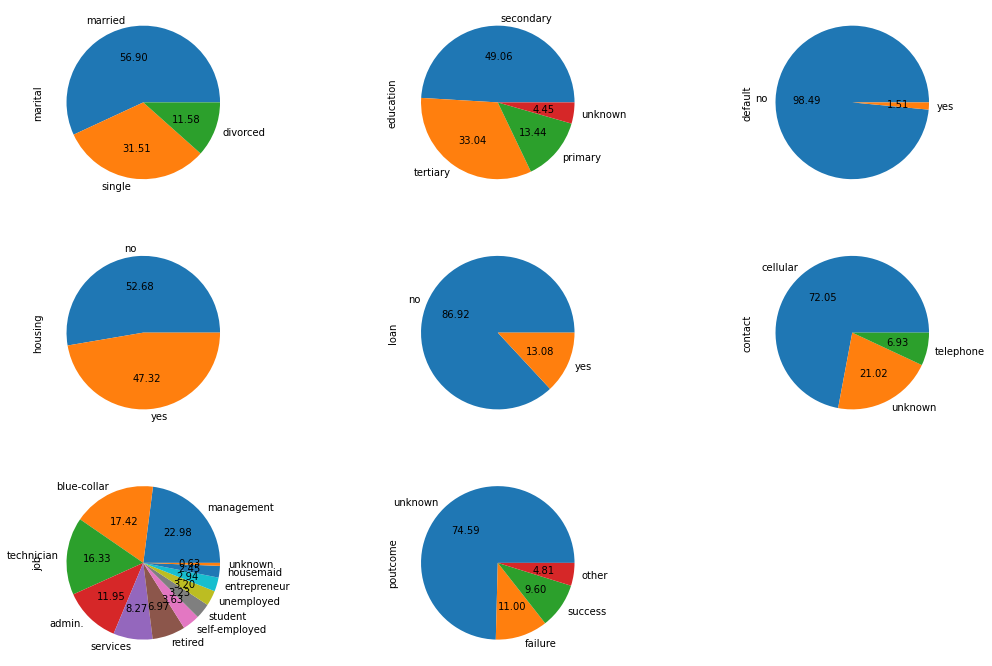

In [ ]:
#understanding categorical features distribution
plt.figure(figsize=(18,12))

plt.subplot(3,3,1)
df['marital'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,2)
df['education'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,3)
df['default'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,4)
df['housing'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,5)
df['loan'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,6)
df['contact'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,7)
df['job'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,8)
df['poutcome'].value_counts().plot(kind='pie',autopct='%.2f')

plt.show()

<Axes: xlabel='job', ylabel='count'>

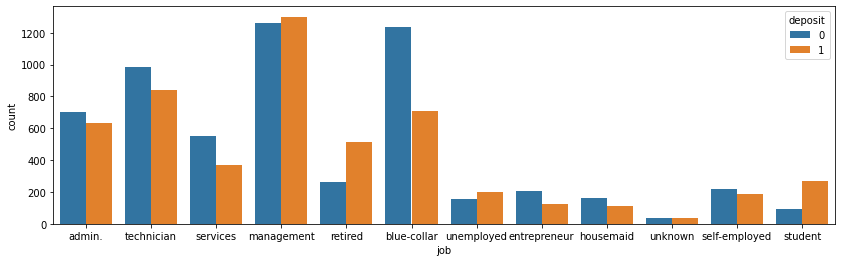

In [ ]:
#For better understanding of features, we can explore further
plt.figure(figsize=(14,4))
sns.countplot(x='job', hue='deposit', data=df)

You can say by just observing that, we should focus on management, technician, blue collar to make them open deposit by effective marketing.

<Axes: xlabel='marital', ylabel='count'>

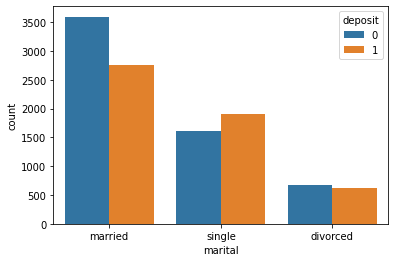

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='deposit', data=df)

Important eda step, will tell about distribution as well as split of classification. We can do for all features.

<Figure size 720x432 with 0 Axes>

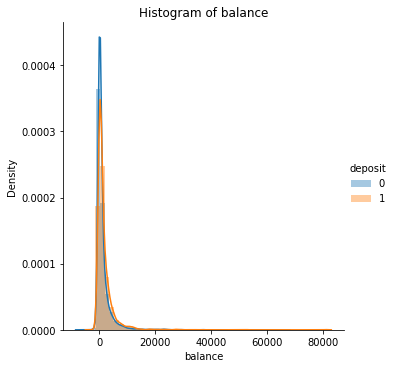

In [ ]:
# plotting histogram (smooth line is pdf)
plt.figure(figsize=(10, 6))
sns.FacetGrid(df, hue="deposit", height=5) \
   .map(sns.distplot, "balance") \
   .add_legend();
plt.title('Histogram of balance')
plt.show();

<Figure size 720x432 with 0 Axes>

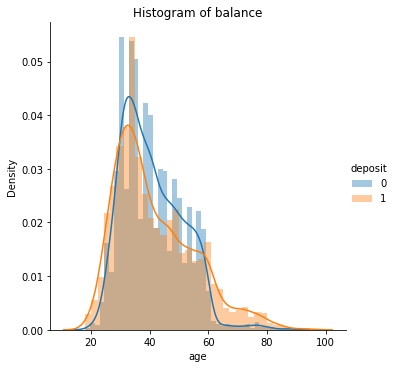

In [ ]:
# plotting histogram (smooth line is pdf)
plt.figure(figsize=(10, 6))
sns.FacetGrid(df, hue="deposit", height= 5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of balance')
plt.show();

[7.76991309e-01 2.05716334e-01 1.21852881e-02 3.31511513e-03
 1.07517248e-03 8.95977063e-05 2.68793119e-04 8.95977063e-05
 8.95977063e-05 1.79195413e-04]
[-6847.   1958.1 10763.2 19568.3 28373.4 37178.5 45983.6 54788.7 63593.8
 72398.9 81204. ]


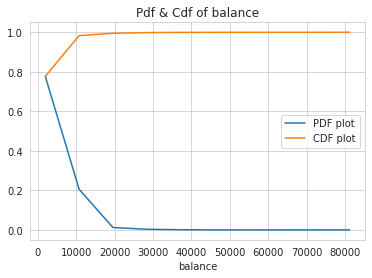

In [ ]:
#Plot CDF of age
sns.set_style('whitegrid')
counts, bin_edges = np.histogram(df['balance'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('Pdf & Cdf of balance')
plt.legend(['PDF plot', 'CDF plot'])
plt.xlabel("balance")
plt.show();

You should do numeric **standardized or normalixed** numerica data to get rid of different scale(measure) problem.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank = df.copy()

scaler = StandardScaler()
#fetching all numerical cols
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank[num_cols] = scaler.fit_transform(df_bank[num_cols]) #RHS part run first

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491409,admin.,married,secondary,no,0.252474,yes,no,unknown,-1.265654,may,-0.554161,-0.481211,-0.363278,unknown,1
1,1.239584,admin.,married,secondary,no,-0.460000,no,no,unknown,-1.265654,may,-0.554161,-0.481211,-0.363278,unknown,1
2,-0.019539,technician,married,secondary,no,-0.080200,yes,no,unknown,-1.265654,may,-0.554161,-0.481211,-0.363278,unknown,1
3,1.155642,services,married,secondary,no,0.293709,yes,no,unknown,-1.265654,may,-0.554161,-0.481211,-0.363278,unknown,1
4,1.071701,admin.,married,tertiary,no,-0.416904,no,no,unknown,-1.265654,may,-0.186794,-0.481211,-0.363278,unknown,1


In [ ]:
# One hot encoding using get_dummies
#If we don't use 'drop_first=True' then d=51, after that it's 42
enc_bank = pd.get_dummies(df_bank, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)
enc_bank.head()

,age,balance,day,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491409,0.252474,-1.265654,-0.554161,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.239584,-0.460000,-1.265654,-0.554161,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.019539,-0.080200,-1.265654,-0.554161,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.155642,0.293709,-1.265654,-0.554161,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.071701,-0.416904,-1.265654,-0.186794,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X= enc_bank.drop('deposit', axis=1)
y= enc_bank['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)

In [ ]:
X.head()
y.head()
# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (7812, 41)
Shape of testing feature: (3349, 41)
Shape of training label: (7812,)
Shape of training label: (3349,)


In [ ]:
#This function will calculate all metrics result, we call with every model we use
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics   #this will perform all tasks of calculations

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(random_state= 0) 
#random_state(typically 42)- consistent result & to shuffle the data, improves model performance on test data 
logreg.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.7079725291131681
Precision: 0.7486381322957198
Recall: 0.5949288806431664
F1 Score: 0.6629910406616127
Area Under Curve: 0.7633672826678436
Confusion Matrix


<Axes: >

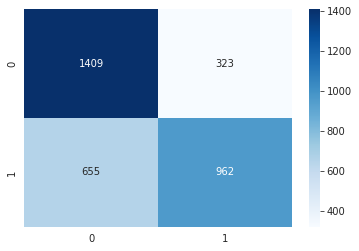

In [ ]:
# Evaluate Model
logreg_eval = evaluate_model(logreg, X_test, y_test)

# Print result
print('Accuracy:', logreg_eval['acc'])
print('Precision:', logreg_eval['prec'])
print('Recall:', logreg_eval['rec'])
print('F1 Score:', logreg_eval['f1'])
print('Area Under Curve:', logreg_eval['auc'])
#print('Confusion Matrix:\n', logreg_result['cm'])
print('Confusion Matrix')
sns.heatmap(logreg_eval['cm'], annot=True, cmap='Blues', fmt='g')

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB(random_state=0)
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.6825918184532697
Precision: 0.778672032193159
Recall: 0.47866419294990725
F1 Score: 0.5928762926081961
Area Under Curve: 0.7361697880915961
Confusion Matrix:
 [[1512  220]
 [ 843  774]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier(random_state=0)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:

knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.6846819946252612
Precision: 0.704
Recall: 0.5986394557823129
F1 Score: 0.6470588235294117
Area Under Curve: 0.7333920341178671
Confusion Matrix:
 [[1325  407]
 [ 649  968]]


In [ ]:
#Linear SVC because of classification
from sklearn.svm import LinearSVC
lrsvc = LinearSVC(random_state=0)

# Train the model on the training data
lrsvc.fit(X_train, y_train)

LinearSVC()

In [ ]:
from sklearn import metrics 
y_pred = lrsvc.predict(X_test)
lrsvc_acc = metrics.accuracy_score(y_test, y_pred)
lrsvc_prec = metrics.precision_score(y_test, y_pred)
lrsvc_rec = metrics.recall_score(y_test, y_pred)
lrsvc_f1 = metrics.f1_score(y_test, y_pred)
lrsvc_cm = metrics.confusion_matrix(y_test, y_pred)
# Print result
print('Accuracy:', lrsvc_acc)
print('Precision:', lrsvc_prec)
print('Recall:', lrsvc_rec)
print('F1 Score:', lrsvc_f1)
print('Confusion Matrix:\n', lrsvc_cm)

Accuracy: 0.7052851597491788
Precision: 0.7488151658767772
Recall: 0.5862708719851577
F1 Score: 0.6576482830385015
Confusion Matrix:
 [[1414  318]
 [ 669  948]]


In [ ]:
#Decision Tree
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Evaluate Model
dt_eval = evaluate_model(dt, X_test, y_test)

# Print result
print('Accuracy:', dt_eval['acc'])
print('Precision:', dt_eval['prec'])
print('Recall:', dt_eval['rec'])
print('F1 Score:', dt_eval['f1'])
print('Area Under Curve:', dt_eval['auc'])
print('Confusion Matrix:\n', dt_eval['cm'])

Accuracy: 0.6339205733054644
Precision: 0.6209029066171924
Recall: 0.6209029066171924
F1 Score: 0.6209029066171924
Area Under Curve: 0.633488404809751
Confusion Matrix:
 [[1119  613]
 [ 613 1004]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.7181248133771275
Precision: 0.7472446730345335
Recall: 0.6289424860853432
F1 Score: 0.6830087306917394
Area Under Curve: 0.7821565325689378
Confusion Matrix:
 [[1388  344]
 [ 600 1017]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Building Random Forest model 
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Evaluate Model
gb_eval = evaluate_model(gb, X_test, y_test)

# Print result
print('Accuracy:', gb_eval['acc'])
print('Precision:', gb_eval['prec'])
print('Recall:', gb_eval['rec'])
print('F1 Score:', gb_eval['f1'])
print('Area Under Curve:', gb_eval['auc'])
print('Confusion Matrix:\n', gb_eval['cm'])

Accuracy: 0.7315616601970738
Precision: 0.7853736089030207
Recall: 0.6110080395794681
F1 Score: 0.687304347826087
Area Under Curve: 0.791400656420452
Confusion Matrix:
 [[1462  270]
 [ 629  988]]


In [ ]:
# Create a DataFrame to hold the performance metrics for each model
performance_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Add performance metrics for model 1
performance_table = performance_table.append({'Model': 'logreg',
                                              'Accuracy': logreg_eval['acc'],
                                              'Precision': logreg_eval['prec'],
                                              'Recall': logreg_eval['rec'],
                                              'F1 Score': logreg_eval['f1'],
                                              'AUC': logreg_eval['auc'] }, ignore_index=True)

performance_table = performance_table.append({'Model': 'NB',
                                              'Accuracy': nb_eval['acc'],
                                              'Precision': nb_eval['prec'],
                                              'Recall': nb_eval['rec'],
                                              'F1 Score': nb_eval['f1'],
                                              'AUC': nb_eval['auc'] }, ignore_index=True)

performance_table = performance_table.append({'Model': 'knn',
                                              'Accuracy': knn_eval['acc'],
                                              'Precision': knn_eval['prec'],
                                              'Recall': knn_eval['rec'],
                                              'F1 Score': knn_eval['f1'],
                                              'AUC': knn_eval['auc'] }, ignore_index=True)

performance_table = performance_table.append({'Model': 'linearsvc',
                                              'Accuracy': lrsvc_acc,
                                              'Precision': lrsvc_prec,
                                              'Recall': lrsvc_rec,
                                              'F1 Score': lrsvc_f1,
                                               }, ignore_index=True)

performance_table = performance_table.append({'Model': 'Decision Tree',
                                              'Accuracy': dt_eval['acc'],
                                              'Precision': dt_eval['prec'],
                                              'Recall': dt_eval['rec'],
                                              'F1 Score': dt_eval['f1'],
                                              'AUC': dt_eval['auc'] }, ignore_index=True)

performance_table = performance_table.append({'Model': 'Random Forest',
                                              'Accuracy': rf_eval['acc'],
                                              'Precision': rf_eval['prec'],
                                              'Recall': rf_eval['rec'],
                                              'F1 Score': rf_eval['f1'],
                                              'AUC': rf_eval['auc'] }, ignore_index=True)

performance_table = performance_table.append({'Model': 'GradBoost',
                                              'Accuracy': gb_eval['acc'],
                                              'Precision': gb_eval['prec'],
                                              'Recall': gb_eval['rec'],
                                              'F1 Score': gb_eval['f1'],
                                              'AUC': gb_eval['auc'] }, ignore_index=True)

# Print the performance table
print(performance_table)

           Model  Accuracy  Precision    Recall  F1 Score       AUC
0         logreg  0.707973   0.748638  0.594929  0.662991  0.763367
1             NB  0.682592   0.778672  0.478664  0.592876  0.736170
2            knn  0.684682   0.704000  0.598639  0.647059  0.733392
3      linearsvc  0.705285   0.748815  0.586271  0.657648       NaN
4  Decision Tree  0.633921   0.620903  0.620903  0.620903  0.633488
5  Random Forest  0.718125   0.747245  0.628942  0.683009  0.782157
6      GradBoost  0.731562   0.785374  0.611008  0.687304  0.791401


By comparing, Random Forest is the best model (AUC score, Recall) amongst all.

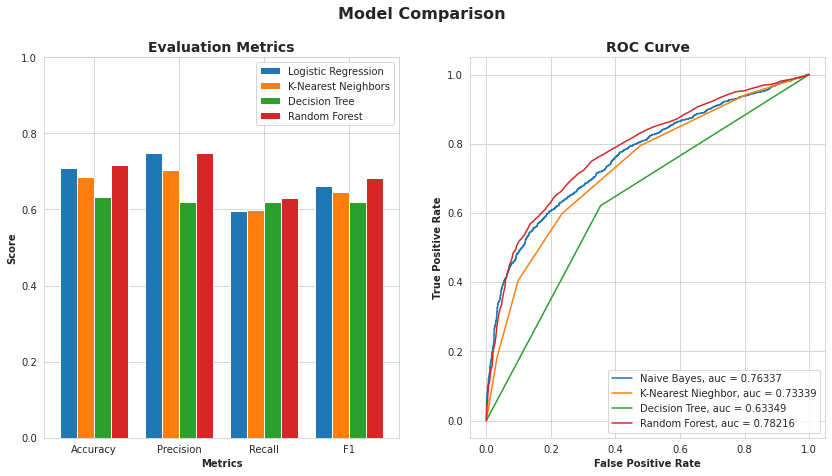

In [ ]:
# Use someone's code:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
logreg_score = [logreg_eval['acc'], logreg_eval['prec'], logreg_eval['rec'], logreg_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1']]


## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, logreg_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r4, rf_score, width=barWidth, edgecolor='white', label='Random Forest')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(logreg_eval['fpr'], logreg_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(logreg_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

By far RF is the best model in terms of Recall & AUC score, so will optimize RF model further

In [ ]:
#GridSearchCV from sklearn to find the optimal parameter(by tuning) for our model.
#use cross validation to train our model (k-fold= 5, 5cv)
#use best_params_ to find best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

It takes approx. 30 minutes to executed, computationally heavy, how to reduce:

lesser range of grid search,
reduce no. of folds, check other passing parameters in hyperpara function of your model. Remebewr to maintain efficeiency & accuracy by doing this.

More steps:

Feature selection,
PCA (dim red.)

In [ ]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.7252911316810988
Precision: 0.7729052466718872
Recall: 0.6103896103896104
F1 Score: 0.6821008984105045
Area Under Curve: 0.7889581824751736
Confusion Matrix:
 [[1442  290]
 [ 630  987]]


By comparing this two models, we can say that optimized rf model is better than baseliune RF.

But, because we focus more on Recall score so we will take our baseline model as final model (predicting as many actual positive values as possible).

Conclusion:
There are still some weakness on our model, especially shown on the recall metric where we only get about 60%. This means that our model are only able to detect 60% of potential customer and miss the other 40%.

In [78]:
pca_bank = pd.get_dummies(df_bank, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)
pca_bank.head()

,age,balance,day,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491409,0.252474,-1.265654,-0.554161,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.239584,-0.460000,-1.265654,-0.554161,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.019539,-0.080200,-1.265654,-0.554161,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.155642,0.293709,-1.265654,-0.554161,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.071701,-0.416904,-1.265654,-0.186794,-0.481211,-0.363278,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [79]:
from sklearn.model_selection import train_test_split

X= pca_bank.drop('deposit', axis=1)
y= pca_bank['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)

In [163]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 28)

# Fit the data to the PCA model using only the training dataset
X_train_transformed = pca.fit_transform(X_train)

# Transform the test dataset using the same PCA model
X_test_transformed = pca.transform(X_test)

In [164]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
pc_rf = RandomForestClassifier(random_state=0)
pc_rf.fit(X_train_transformed, y_train)

RandomForestClassifier(random_state=0)

In [165]:
# Evaluate Model
pc_rf_eval = evaluate_model(pc_rf, X_test_transformed, y_test)

# Print result
print('Accuracy:', pc_rf_eval['acc'])
print('Precision:', pc_rf_eval['prec'])
print('Recall:', pc_rf_eval['rec'])
print('F1 Score:', pc_rf_eval['f1'])
print('Area Under Curve:', pc_rf_eval['auc'])
print('Confusion Matrix:\n', pc_rf_eval['cm'])

Accuracy: 0.7100627052851598
Precision: 0.7261904761904762
Recall: 0.6413110698824984
F1 Score: 0.6811165845648604
Area Under Curve: 0.7675236481323582
Confusion Matrix:
 [[1341  391]
 [ 580 1037]]


After pca(reducing dimensions) & by incereasing pca components Recall is improving.

I have tried from 5 components to 40, at after 35 recall starts decreasing.

After tried different values. I found 28 components gives approx best score which is 0.6413 which is greater than our best baseline RF mofel(0.628).
AUC is 0.767

CLearly we can improve recall by using most important features(principal components).

1.   RF scores (base model) Without PCA:

Accuracy: 0.7181248133771275

Precision: 0.7472446730345335

Recall: 0.6289424860853432

F1 Score: 0.6830087306917394

Area Under Curve: 0.7821565325689378


2.   RF scores WITH PCA (base model):

Accuracy: 0.7100627052851598

Precision: 0.7261904761904762

Recall: 0.6413110698824984

F1 Score: 0.6811165845648604

Area Under Curve: 0.7675236481323582



In RF: With PCA we increased our recall score without much affecting other scores like AUC.

I have tried LR with PCA as well, there also incresed Recall score(close to- 0.65) but, In LR: AUC and all suffers (meaningful low scores compare to RF).
So, that's a trade-off between Recall & AUC/accuracy.

We will use RF with PCA to achieve best Recall score with maintaining AUC score as well.